# Computational Linear Algebra
### Using SVD for audio compression
Juan Camilo Sarmiento - Equinox - Plan Semilla - Data Science

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from scipy.io import wavfile
from scipy import signal
import os
import glob

Load audio files:

In [48]:
audios=[]
list_audios= glob.glob(os.path.join(os.getcwd(),"Audios","*.wav"))
audios.extend(librosa.load(audiof) for audiof in list_audios)  #load gives data,sr

In [51]:
audios[0][0].shape,audios[0][0].dtype,type(audios[0][0]),audios[0][1],type(audios[0][1])

((110250,), dtype('float32'), numpy.ndarray, 22050, int)

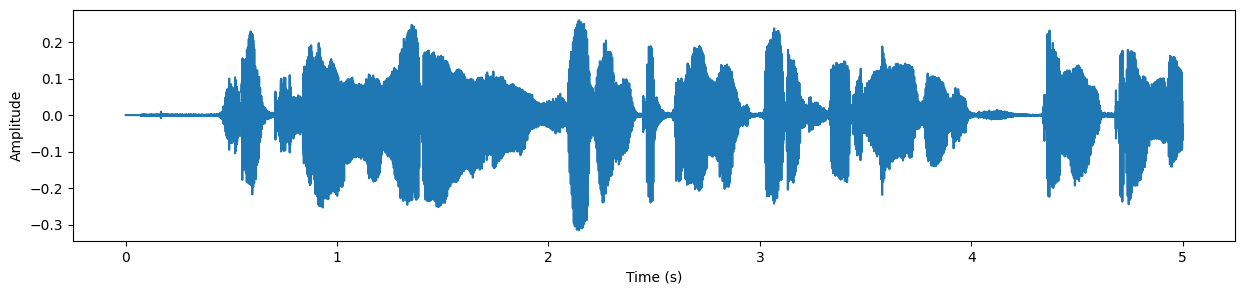

In [37]:
plt.figure(figsize=(15,3))
t=np.arange(0,5,5/audios[0][0].shape[0])
plt.plot(t,audios[0][0])
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.show()

Get the STFT of the audio to get frequency by time representation

(STFT = Short Time Fourier Transform)

In [13]:
stft=signal.stft(audios[0][0],fs=audios[0][1],nperseg=256,window="hann",noverlap=128,nfft=256)
stft[0].shape,stft[1].shape,stft[2].shape   #0:f, 1:t, 2:Zxx

((129,), (863,), (129, 863))

In [14]:
stft[2][0,0]   #Zxx is spectrogram  (freq by t, and the values are complex, must convert to real by extracting magnitude and phase)

(5.2458727e-08+0j)

Return to time representation via ISTFT

(ISTFT = Inverse Short Time Fourier Transform)

In [16]:
_,istft=signal.istft(stft[2],fs=22050,nperseg=256,window="hann",noverlap=128,nfft=256)   #nperseg=256 is default of stft
istft.shape,audios[0][0].shape

((110336,), (110250,))

STFT with librosa package:

In [18]:
stft_lib=librosa.stft(audios[0][0])
stft_lib.shape

(1025, 216)

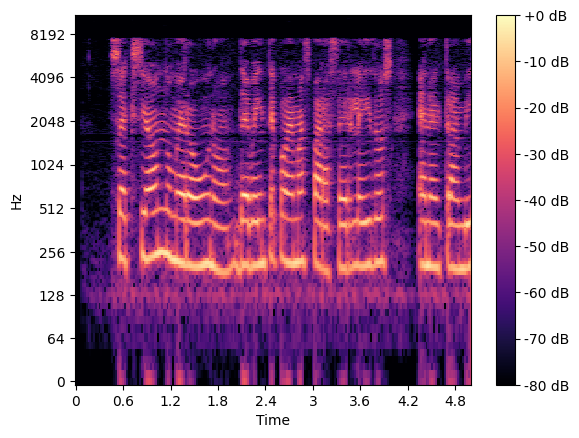

In [24]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft_lib),ref=np.max),y_axis='log', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.0f dB")

ISTFT with librosa package

In [20]:
istft_lib=librosa.istft(stft_lib,length=audios[0][0].shape[0])
istft_lib.shape,audios[0][0].shape

((110250,), (110250,))

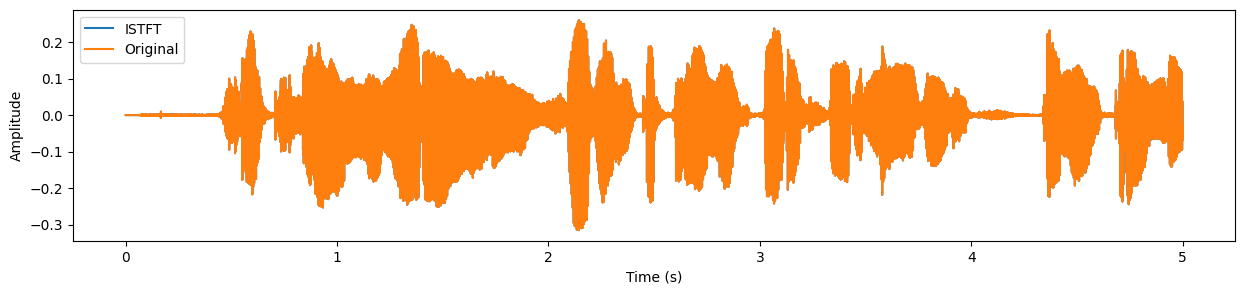

In [36]:
plt.figure(figsize=(15,3))
t=np.arange(0,5,5/audios[0][0].shape[0])
plt.plot(t,istft_lib,label="ISTFT")
plt.plot(t,audios[0][0],label="Original")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.legend()
plt.show()

Define functions to convert complex numbers to real numbers representation:

In [32]:
def magphase(Z):
    mag=np.abs(Z)
    phase=np.angle(Z)
    return mag,phase

def polar2complex(r,ang):
    Z=r*(np.cos(ang)+np.sin(ang)*1j)
    return Z

In [17]:
test_magphase=magphase(stft[2])
test_magphase[0][:5,:5],test_magphase[1][:5,:5]

(array([[0.00171897, 0.00427249, 0.01118497, 0.01791891, 0.02559109],
        [0.00278128, 0.01041315, 0.01078627, 0.02136936, 0.00608069],
        [0.00409667, 0.01523915, 0.00949762, 0.00794812, 0.01964462],
        [0.00376216, 0.00921892, 0.00490887, 0.00328555, 0.02343777],
        [0.00177848, 0.00433724, 0.02403757, 0.01819509, 0.01388809]],
       dtype=float32),
 array([[ 0.0000000e+00,  3.1415927e+00,  0.0000000e+00,  3.1415927e+00,
          3.1415927e+00],
        [ 9.2377663e-01, -7.3530179e-01,  2.1196437e+00, -9.6182030e-01,
          3.6245415e-01],
        [ 2.5397494e+00,  2.5491869e+00, -1.8669441e+00,  2.4582865e+00,
          1.8102940e-03],
        [-1.9918453e+00, -6.0269666e-01,  2.1641262e+00, -1.0087243e+00,
         -3.1290441e+00],
        [-8.7728900e-01,  1.8731394e+00, -3.4574279e-01,  1.7204913e+00,
         -1.6573492e-02]], dtype=float32))

In [20]:
test_polarcomplex=polar2complex(test_magphase[0],test_magphase[1])
test_polarcomplex.shape,test_polarcomplex[:5,:5]

((129, 863),
 array([[ 0.00171897+0.0000000e+00j, -0.00427249-3.7351261e-10j,
          0.01118497+0.0000000e+00j, -0.01791891-1.5665206e-09j,
         -0.02559109-2.2372444e-09j],
        [ 0.00167659+2.2191396e-03j,  0.00772269-6.9852569e-03j,
         -0.00562724+9.2020519e-03j,  0.01222387-1.7527878e-02j,
          0.00568563+2.1560311e-03j],
        [-0.00337686+2.3193820e-03j, -0.0126424 +8.5089095e-03j,
         -0.00277176-9.0841651e-03j, -0.00616368+5.0181258e-03j,
          0.01964458+3.5562512e-05j],
        [-0.00153766-3.4335752e-03j,  0.00759464-5.2258908e-03j,
         -0.00274467+4.0698610e-03j,  0.001751  -2.7800731e-03j,
         -0.02343592-2.9410340e-04j],
        [ 0.00113688-1.3676705e-03j, -0.00129145+4.1405126e-03j,
          0.02261512-8.1462273e-03j, -0.00271355+1.7991610e-02j,
          0.01388619-2.3016369e-04j]], dtype=complex64))

Define functions for compression with SVD:

In [33]:
def compress(matrix,percentage):
    U,S,V=np.linalg.svd(matrix,full_matrices=False)
    S=np.diag(S)
    i=int(S.shape[0]*percentage)
    compressed=np.matmul(U[:,:i],np.matmul(S[:i,:i],V[:i,:]))
    return compressed,U,S,V

def compress_audio(audio,fs,percentage):
    Z=librosa.stft(audio)
    mag,phase=magphase(Z)
    mag_compressed,_,_,_=compress(mag,percentage)
    phase_compressed,_,_,_=compress(phase,percentage)
    Z_compressed=polar2complex(mag_compressed,phase_compressed)
    audio_compressed=librosa.istft(Z_compressed,length=audio.shape[0])
    return audio_compressed


In [52]:
audio0_compressed=compress_audio(audios[0][0],audios[0][1],percentage=0.2)
name_save=os.path.join(os.getcwd(),"Audios","compressed20%"+os.path.basename(list_audios[0]))
wavfile.write(name_save,audios[0][1],data=audio0_compressed.astype(np.float32))

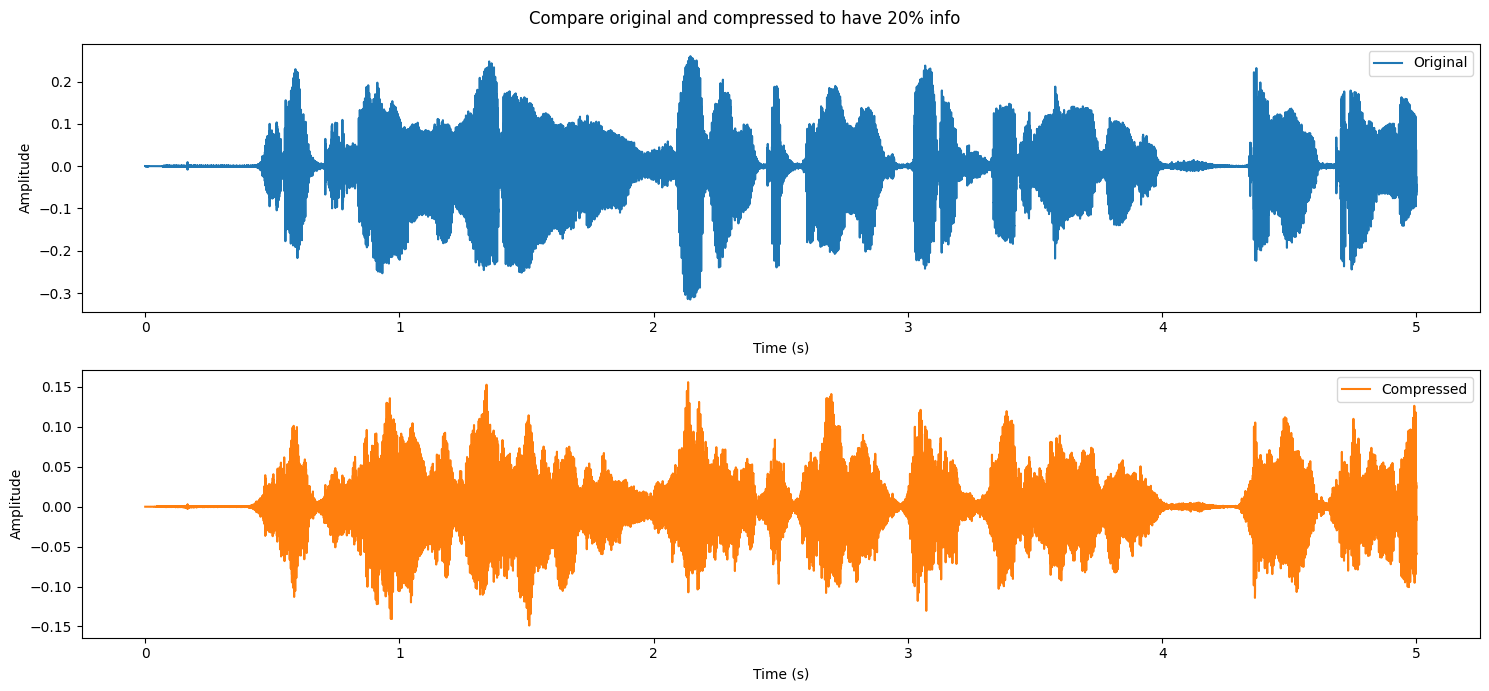

In [42]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,7),tight_layout=True)
t=np.arange(0,5,5/audios[0][0].shape[0])
ax[0].plot(t,audios[0][0],label="Original",color="tab:blue")
ax[0].set_ylabel("Amplitude")
ax[0].set_xlabel("Time (s)")
ax[0].legend()
ax[1].plot(t,audio0_compressed,label="Compressed",color="tab:orange")
ax[1].set_ylabel("Amplitude")
ax[1].set_xlabel("Time (s)")
ax[1].legend()
plt.suptitle("Compare original and compressed to have 20% info")
plt.show()

In [53]:
original_stats=os.stat(list_audios[0])
compressed_stats=os.stat(name_save)
print(f"Original file size is {original_stats.st_size}")
print(f"Compressed file size is {compressed_stats.st_size}")


Original file size is 220544
Compressed file size is 441058


As we can see, SVD is not a reliable source of compression as the resulting audio can vary the amplitude and doing so, the file size